In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
#Importing the data ,creating dataframe
df=pd.read_csv("housing.csv")

df

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 11,Unnamed: 12
0,1,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY,NaN,NaN
1,2,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY,NaN,NaN
2,3,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY,NaN,NaN
3,4,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY,NaN,NaN
4,5,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20636,-121.09,39.48,25,1665.0,374.0,845,330,1.8603,78400,INLAND,NaN,NaN
20636,20637,-121.21,39.49,18,697.0,150.0,356,114,2.8568,77400,INLAND,NaN,NaN
20637,20638,-121.22,39.43,17,2254.0,485.0,1007,433,2.0000,92600,INLAND,NaN,NaN
20638,20639,-121.32,39.43,18,1860.0,409.0,741,349,2.1672,85000,INLAND,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  object 
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(7), int64(4), object(2)
memory usage: 2.0+ MB


In [5]:
#Removing the two columns named "Unnamed:11 and Unnamed: 12" as they are empty and also "id" column  as it  doesnt relate to our goal "
df.drop(['Unnamed: 11','Unnamed: 12','id'],axis=1,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.6252,452900,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.6014,358800,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.5574,352400,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.9431,341600,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,4.1462,342500,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845,330,1.8603,78400,INLAND
20636,-121.21,39.49,18,697.0,150.0,356,114,2.8568,77400,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007,433,2.0000,92600,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741,349,2.1672,85000,INLAND


In [6]:
#Checking if there are any empty row values for any feature
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             3
total_bedrooms        207
population              0
households              0
median_income           4
median_house_value      0
ocean_proximity        10
dtype: int64

### Here we see out total_bedrooms has 207 empty rows, we impute the median value for this column for the empty cells .
### Also, total_rooms, median_income & ocean_proximity has very few empty rows, we delete those rows as they don't have much impact in this big dataset.

In [7]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True) #Replacing with mean value
df.dropna(inplace=True) #Dropping remaining empty rows
df.isna().sum()



C:\Users\Welcome\AppData\Local\Temp\ipykernel_7412\3565571619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True) #Replacing with mean value


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
#Checking if there are any duplicate values
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20623 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20623 non-null  float64
 1   latitude            20623 non-null  float64
 2   housing_median_age  20623 non-null  int64  
 3   total_rooms         20623 non-null  float64
 4   total_bedrooms      20623 non-null  float64
 5   population          20623 non-null  int64  
 6   households          20623 non-null  object 
 7   median_income       20623 non-null  float64
 8   median_house_value  20623 non-null  int64  
 9   ocean_proximity     20623 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 1.7+ MB


#### Changing datatype of 'households" column to float from object as it contains all numeric data.
#### However, the household column has 2 date values, so we drop two date values and convert the column datatype to float64

In [10]:
#Trying to change datatype of Households to Float, but we get an error, as some date values are present
#So we have to clean the column Households from those values and then change datatype to Float


#df['households']=df['households'].astype(float)---> thorws error sue to presence of dates
df=df.drop(df[(df['households']=='23-05-2011') | (df['households']=='21-05-2011')].index)

df['households']=df['households'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20620 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20620 non-null  float64
 1   latitude            20620 non-null  float64
 2   housing_median_age  20620 non-null  int64  
 3   total_rooms         20620 non-null  float64
 4   total_bedrooms      20620 non-null  float64
 5   population          20620 non-null  int64  
 6   households          20620 non-null  float64
 7   median_income       20620 non-null  float64
 8   median_house_value  20620 non-null  int64  
 9   ocean_proximity     20620 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.7+ MB


#### Here we combine the two columns namely 'total_rooms' and 'total_bedrooms' to get the over all room count and drop the old column

In [11]:
df['total_rooms']=df['total_rooms']+df['total_bedrooms']
df.drop(columns=['total_bedrooms'],inplace=True)
df


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,1009.0,322,126.0,8.6252,452900,NEAR BAY
1,-122.22,37.86,21,8205.0,2401,1138.0,8.6014,358800,NEAR BAY
2,-122.24,37.85,52,1657.0,496,177.0,7.5574,352400,NEAR BAY
3,-122.25,37.85,52,1509.0,558,219.0,5.9431,341600,NEAR BAY
4,-122.25,37.85,52,1907.0,565,259.0,4.1462,342500,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,2039.0,845,330.0,1.8603,78400,INLAND
20636,-121.21,39.49,18,847.0,356,114.0,2.8568,77400,INLAND
20637,-121.22,39.43,17,2739.0,1007,433.0,2.0000,92600,INLAND
20638,-121.32,39.43,18,2269.0,741,349.0,2.1672,85000,INLAND


## Exploratory Data Analysis (EDA)


Text(0.5, 1.0, 'Distribution of total_rooms')

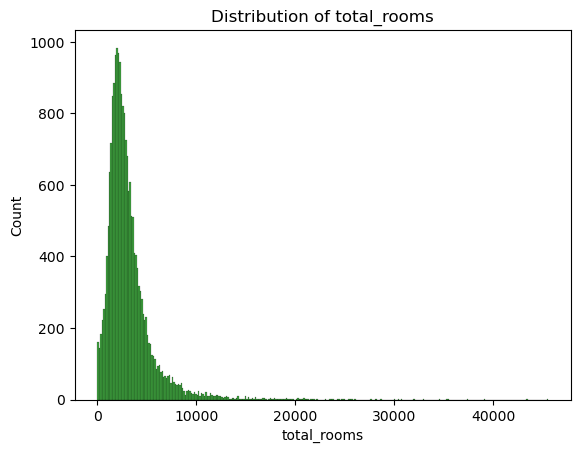

In [12]:
# Distribution of total_rooms
sns.histplot(df['total_rooms'],color='g')
plt.title("Distribution of total_rooms")

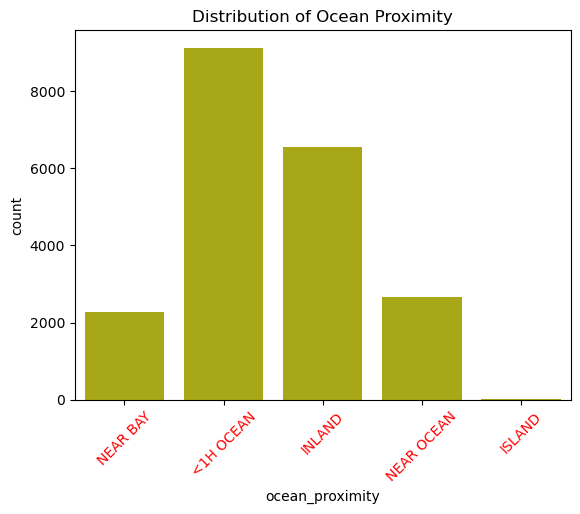

In [13]:
#Distribution of Ocean Proximity
sns.countplot(x=df["ocean_proximity"],color='y')
plt.xticks(rotation=45,color='r')
plt.title("Distribution of Ocean Proximity")
plt.show()

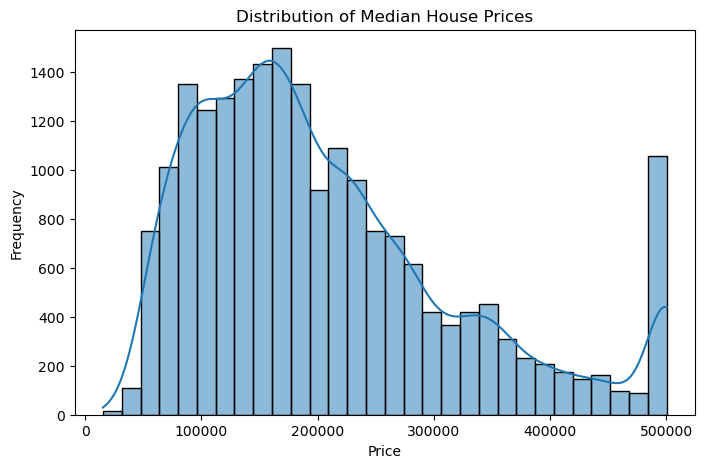

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title("Distribution of Median House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

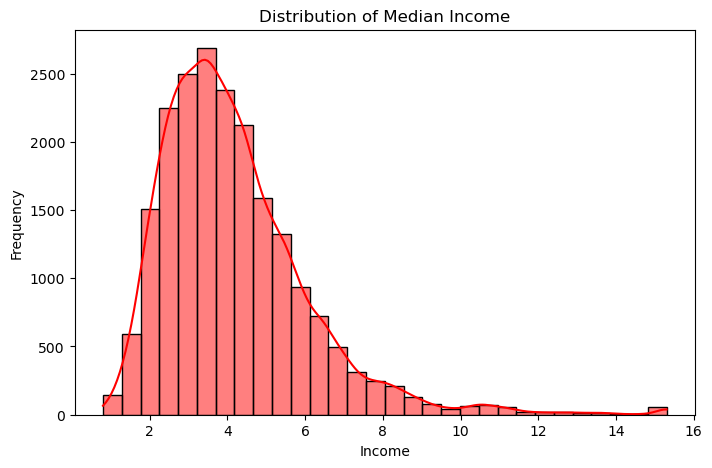

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['median_income'], bins=30, color='r',kde=True)
plt.title("Distribution of Median Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

##### Creating age bins for different housing age categories

In [16]:

bins = [0, 10, 20, 50, 100]
labels = ['0-10', '11-20', '21-50', '51-100']
df['Age_Category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels)


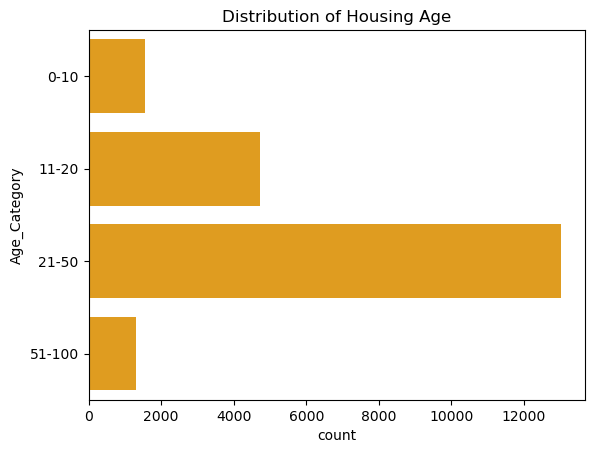

In [17]:
sns.countplot(df['Age_Category'],color='orange')
plt.title("Distribution of Housing Age")
plt.show()

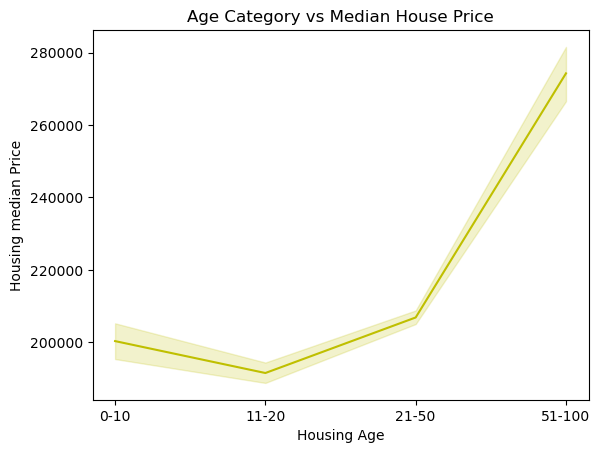

In [18]:
sns.lineplot(x=df['Age_Category'],y=df['median_house_value'],color='y')
plt.title("Age Category vs Median House Price")
plt.xlabel("Housing Age")
plt.ylabel("Housing median Price")
plt.show()

## Feature Engineering
##### There is only one categorical column in the data which is 'ocean proximity', so we use One-Hot-Encoding to convert it into numerical columns of different categries

In [19]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True) #ONE-HOT encoding

# Convert only boolean columns to integers (0/1)
for col in df.columns:
    if df[col].dtype == 'bool':  # Check if the column is boolean
        df[col] = df[col].astype(int)  # Convert to 0 and 1
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,Age_Category,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,1009.0,322,126.0,8.6252,452900,21-50,0,0,1,0
1,-122.22,37.86,21,8205.0,2401,1138.0,8.6014,358800,21-50,0,0,1,0
2,-122.24,37.85,52,1657.0,496,177.0,7.5574,352400,51-100,0,0,1,0
3,-122.25,37.85,52,1509.0,558,219.0,5.9431,341600,51-100,0,0,1,0
4,-122.25,37.85,52,1907.0,565,259.0,4.1462,342500,51-100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,2039.0,845,330.0,1.8603,78400,21-50,1,0,0,0
20636,-121.21,39.49,18,847.0,356,114.0,2.8568,77400,11-20,1,0,0,0
20637,-121.22,39.43,17,2739.0,1007,433.0,2.0000,92600,11-20,1,0,0,0
20638,-121.32,39.43,18,2269.0,741,349.0,2.1672,85000,11-20,1,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20620 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   20620 non-null  float64 
 1   latitude                    20620 non-null  float64 
 2   housing_median_age          20620 non-null  int64   
 3   total_rooms                 20620 non-null  float64 
 4   population                  20620 non-null  int64   
 5   households                  20620 non-null  float64 
 6   median_income               20620 non-null  float64 
 7   median_house_value          20620 non-null  int64   
 8   Age_Category                20620 non-null  category
 9   ocean_proximity_INLAND      20620 non-null  int32   
 10  ocean_proximity_ISLAND      20620 non-null  int32   
 11  ocean_proximity_NEAR BAY    20620 non-null  int32   
 12  ocean_proximity_NEAR OCEAN  20620 non-null  int32   
dtypes: category(1), float

In [21]:
#Dropping Age Category column as its no longer needed, we created it for our analysis
df.drop(columns=['Age_Category'],inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,1009.0,322,126.0,8.6252,452900,0,0,1,0
1,-122.22,37.86,21,8205.0,2401,1138.0,8.6014,358800,0,0,1,0
2,-122.24,37.85,52,1657.0,496,177.0,7.5574,352400,0,0,1,0
3,-122.25,37.85,52,1509.0,558,219.0,5.9431,341600,0,0,1,0
4,-122.25,37.85,52,1907.0,565,259.0,4.1462,342500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,2039.0,845,330.0,1.8603,78400,1,0,0,0
20636,-121.21,39.49,18,847.0,356,114.0,2.8568,77400,1,0,0,0
20637,-121.22,39.43,17,2739.0,1007,433.0,2.0000,92600,1,0,0,0
20638,-121.32,39.43,18,2269.0,741,349.0,2.1672,85000,1,0,0,0


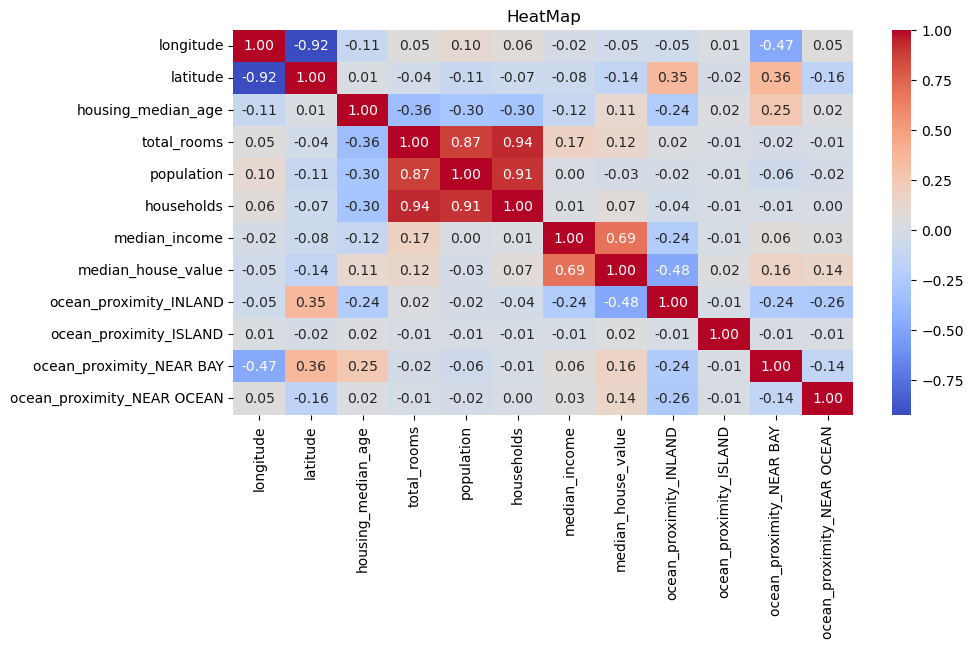

In [22]:

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("HeatMap")
plt.show()


In [23]:
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

### Observation from HeatMap--

There is a strong co-relation between median income and median house value, which is quiet expected and correct as people with hgher income can afford higher priced houses

### Feature Selection

We drop columns which have high multicollenarity and negligible co-relation to our target variable median_house_value 

In [24]:
dff=df.drop(columns=['longitude','population','ocean_proximity_ISLAND'])
dff.isnull().sum()

latitude                      0
housing_median_age            0
total_rooms                   0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [25]:
dff.head()

,latitude,housing_median_age,total_rooms,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,37.88,41,1009.0,126.0,8.6252,452900,0,1,0
1,37.86,21,8205.0,1138.0,8.6014,358800,0,1,0
2,37.85,52,1657.0,177.0,7.5574,352400,0,1,0
3,37.85,52,1509.0,219.0,5.9431,341600,0,1,0
4,37.85,52,1907.0,259.0,4.1462,342500,0,1,0


## Part 2 : Model Training & Evaluation
##### Splittting the dataset into test & train components

In [26]:

from sklearn.model_selection import train_test_split

X=dff.drop(columns=['median_house_value'])
Y=dff['median_house_value']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [27]:
#Saving the test and train components as CSV file

Train_data=pd.DataFrame(X_train)
Train_data['target']=Y_train
Train_data.to_csv("Train_data.csv",index=False)

Test_data=pd.DataFrame(X_test)
Test_data['target']=Y_test
Test_data.to_csv("Test_data.csv",index=False)

In [28]:
Train_data

,latitude,housing_median_age,total_rooms,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,target
4119,34.14,52,4446.0,620.0,5.8524,0,0,0,294200
8681,33.87,44,857.0,133.0,4.2167,0,0,0,265900
1904,38.87,12,1705.0,144.0,4.5250,1,0,0,127900
18872,38.09,18,7939.0,1058.0,5.5957,0,1,0,172200
17457,34.68,6,2464.0,273.0,6.5685,0,0,1,307700
...,...,...,...,...,...,...,...,...,...
11547,33.74,26,4451.0,595.0,6.4280,0,0,0,248500
16080,37.74,52,2891.0,436.0,4.6909,0,0,1,318000
14516,32.91,8,4366.0,918.0,3.1728,0,0,0,114900
14570,32.83,35,2760.0,511.0,3.7482,0,0,1,162800


### Now we perform Scaling using StandardScaler class

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)





# Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=LinearRegression()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

#Evaluation metrics----
MAE=mean_absolute_error(Y_test,Y_pred)
RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
R2score=r2_score(Y_test,Y_pred)

print(f"MAE: {MAE}, RMSE: {RMSE}, R2score: {R2score}")



MAE: 53484.23807019045, RMSE: 73329.67815762866, R2score: 0.6036392309394292


# XGBoost Regressor Model

In [31]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.05,max_depth=5, random_state=40)
xgb_model.fit(X_train, Y_train)

Y_pred = xgb_model.predict(X_test)

#Evaluation metrics----
MAE=mean_absolute_error(Y_test,Y_pred)
RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
R2score=r2_score(Y_test,Y_pred)

print(f"MAE: {MAE}, RMSE: {RMSE}, R2score: {R2score}")


MAE: 44200.56549125545, RMSE: 62769.828153740484, R2score: 0.7095756781274993


# Random Forest Regressor Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

rf_model=RandomForestRegressor(n_estimators=100,random_state=40,max_depth=10)
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)

#Evaluation metric

MAE=mean_absolute_error(Y_test,Y_pred)
RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
R2score=r2_score(Y_test,Y_pred)

print(f"MAE: {MAE}, RMSE: {RMSE}, R2score: {R2score}")



MAE: 44359.7468089209, RMSE: 64106.43411310691, R2score: 0.6970755382236062


### Hyperparameter Tuning of XGBoost model with RandomizedSearchCV as it gave the best R2score among the 3 regression models we tested

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameter Grid
params = {
    'n_estimators': [30,50],  # Number of trees
    'max_depth': [3, 6, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
        }

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=10,  
    cv=5,  
    scoring='r2', 
    random_state=40,
    
)

# Fit the Model
random_search.fit(X_train, Y_train)

# Get the Best Parameters
print("Best Parameters:", random_search.best_params_)

# Use the Best Model to Make Predictions
best_xgb = random_search.best_estimator_
Y_pred = best_xgb.predict(X_test)

# Evaluate Model Performance
MAE = mean_absolute_error(Y_test, Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
R2score = r2_score(Y_test, Y_pred)

print(f"MAE: {MAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"R2 Score: {R2score:.2f}")


Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}
MAE: 42375.05
RMSE: 61573.70
R2 Score: 0.72


# Pickling the XGBoost model and StandardScaler

In [34]:
scaler

StandardScaler()

In [35]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=40, ...)

In [36]:
import pickle

# Saving scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Saving XGBoost model
with open("xgb_model.pkl", "wb") as model_file:
    pickle.dump(best_xgb, model_file)

print("Model saved successfully ")


Model saved successfully 
